In [52]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import imblearn
import lightgbm
import hyperopt

In [30]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import plusmodules as pm
import warnings
warnings.filterwarnings('ignore')

In [31]:
df=pd.read_csv('telco_chrun_encoded (1).csv')
df.head()

,gender,senior,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,total_charges,churn,avg_monthly_charges,internet_service-fiber_optic,internet_service-no,contract-one_year,contract-two_year,payment_method-credit_card_auto,payment_method-electronic_check,payment_method-mailed_check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,0,29.850000,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1889.50,0,55.573529,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,108.15,1,54.075000,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1840.75,0,40.905556,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,151.65,1,75.825000,1,0,0,0,0,1,0


In [32]:
df.shape

(7032, 25)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   gender                           7032 non-null   int64  
 1   senior                           7032 non-null   int64  
 2   partner                          7032 non-null   int64  
 3   dependents                       7032 non-null   int64  
 4   tenure                           7032 non-null   int64  
 5   phone_service                    7032 non-null   int64  
 6   multiple_lines                   7032 non-null   int64  
 7   online_security                  7032 non-null   int64  
 8   online_backup                    7032 non-null   int64  
 9   device_protection                7032 non-null   int64  
 10  tech_support                     7032 non-null   int64  
 11  streaming_tv                     7032 non-null   int64  
 12  streaming_movies    

In [6]:
df=df.sample(frac=0.25, random_state=3)

In [7]:
y=df['churn']
x=df.drop('churn', axis=1)

In [8]:
df['churn'].value_counts()

0    1318
1     440
Name: churn, dtype: int64

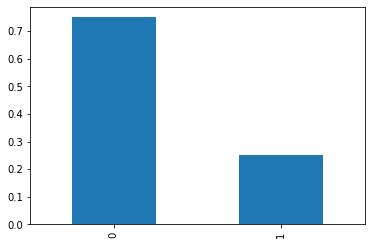

In [9]:
df['churn'].value_counts(normalize=True).plot.bar()

#Building the predictive algorith using Random forest

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.30, random_state=3)

In [11]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
xs=ss.fit_transform(x)

x_trains =ss.fit_transform(x_train)
x_tests =ss.transform(x_test)

Confusion Matrix - Train:  
 [[912   0]
 [  0 318]]
Overall Accuracy - Train:  1.0
AUC- Train: 1.0
Confusion Matrix - Test:  
 [[364  42]
 [ 70  52]]
Overall Accuracy - Test:  0.7878787878787878
AUC- Test: 0.8298372769118953


Text(0, 0.5, 'TPR')

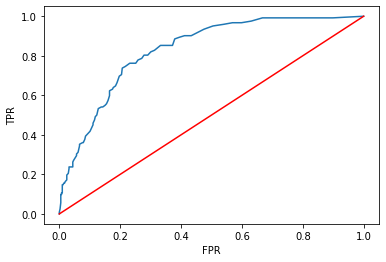

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, roc_curve

rfc=RandomForestClassifier(n_estimators=100)

rfc.fit(x_trains, y_train)

y_train_pred=rfc.predict(x_trains)

y_train_prob=rfc.predict_proba(x_trains)[:,1]

print('Confusion Matrix - Train: ', '\n' ,confusion_matrix(y_train, y_train_pred))

print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))

print('AUC- Train:' , roc_auc_score(y_train, y_train_prob))



y_test_pred= rfc.predict(x_tests)

y_test_prob=rfc.predict_proba(x_tests)[:,1]

print('Confusion Matrix - Test: ', '\n' ,confusion_matrix(y_test, y_test_pred))

print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))

print('AUC- Test:' , roc_auc_score(y_test, y_test_prob))

fpr, tpr, thresholds =roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'red')
plt.xlabel('FPR')
plt.ylabel('TPR')

#Hyper parameter tuning for Random forest

In [13]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint as sp_randint

rfc=RandomForestClassifier(random_state=3)

params={'n_estimators': sp_randint(50, 200),
       'max_features': sp_randint(1, 24),
       'max_depth': sp_randint(2,10),
       'min_samples_split': sp_randint(2, 20),
       'min_samples_leaf': sp_randint(1, 20),
       'criterion': ['gini', 'entropy'] }


rsearch_rfc = RandomizedSearchCV(rfc, param_distributions= params, n_iter=50, cv=3, scoring='roc_auc', 
                   random_state=3, return_train_score=True)

rsearch_rfc.fit(xs, y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [14]:
rsearch_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 2,
 'min_samples_leaf': 16,
 'min_samples_split': 5,
 'n_estimators': 120}

In [15]:
pd.DataFrame(rsearch_rfc.cv_results_).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.175137,0.023511,0.012330,0.001515,gini,2,4,9,2,71,...,0.830451,0.848930,0.841708,0.008065,10,0.852283,0.860699,0.848861,0.853948,0.004974
1,0.815924,0.052228,0.046503,0.007779,entropy,5,11,12,11,188,...,0.820061,0.855198,0.841571,0.015390,11,0.888735,0.896357,0.883738,0.889610,0.005189


Confusion Matrix - Train:  
 [[887  25]
 [193 125]]
Overall Accuracy - Train:  0.8227642276422764
AUC- Train: 0.8874510371841554
Confusion Matrix - Test:  
 [[383  23]
 [ 86  36]]
Overall Accuracy - Test:  0.7935606060606061
AUC- Test: 0.8407494145199063


Text(0, 0.5, 'TPR')

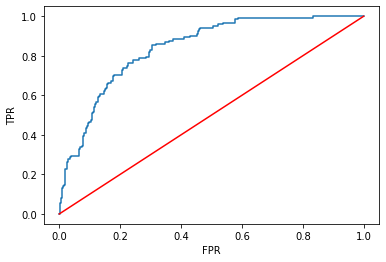

In [16]:
# model using best params
rfc=RandomForestClassifier(**rsearch_rfc.best_params_, random_state=3)

rfc.fit(x_trains, y_train)

y_train_pred=rfc.predict(x_trains)

y_train_prob=rfc.predict_proba(x_trains)[:,1]

print('Confusion Matrix - Train: ', '\n' ,confusion_matrix(y_train, y_train_pred))

print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))

print('AUC- Train:' , roc_auc_score(y_train, y_train_prob))



y_test_pred= rfc.predict(x_tests)

y_test_prob=rfc.predict_proba(x_tests)[:,1]

print('Confusion Matrix - Test: ', '\n' ,confusion_matrix(y_test, y_test_pred))

print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))

print('AUC- Test:' , roc_auc_score(y_test, y_test_prob))

fpr, tpr, thresholds =roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'red')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [17]:
imp = pd.DataFrame(rfc.feature_importances_, index = x.columns, columns=['imp'])

imp = imp.sort_values(by = 'imp', ascending = False)

imp

# the results says the percentage of dropping based on the features, we can use this as feature selection if we remove
#the features which are having the value of 0 we can simply remove those this says that the features are not having any
#impact on data

,imp
tenure,0.155242
total_charges,0.119885
contract-two_year,0.092182
monthly_charges,0.085751
avg_monthly_charges,0.083130
internet_service-fiber_optic,0.077960
payment_method-electronic_check,0.076173
online_security,0.040575
internet_service-no,0.040186
contract-one_year,0.035663


In [18]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint as sp_randint

knn = KNeighborsClassifier()

params= {'n_neighbors': sp_randint(1,20),
        'p': sp_randint(1,5)}

rsearch_knn=RandomizedSearchCV(knn, param_distributions = params, cv=3, random_state=3, n_iter=50)

rsearch_knn.fit(xs, y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029D685FE1D0>,
                                        'p': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029D685FE198>},
                   pre_dispatch='2*n_jobs', random_state=3, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [19]:
rsearch_knn.best_params_

{'n_neighbors': 15, 'p': 1}

Confusion Matrix - Train:  
 [[804 108]
 [113 205]]
Overall Accuracy - Train:  0.8203252032520325
Classification Report - Test               precision    recall  f1-score   support

           0       0.82      0.94      0.88       406
           1       0.61      0.30      0.40       122

    accuracy                           0.79       528
   macro avg       0.71      0.62      0.64       528
weighted avg       0.77      0.79      0.77       528

AUC- Train: 0.8661487642061128
Confusion Matrix - Test:  
 [[348  58]
 [ 53  69]]
Overall Accuracy - Test:  0.7897727272727273
AUC- Test: 0.8143018654607121


Text(0, 0.5, 'TPR')

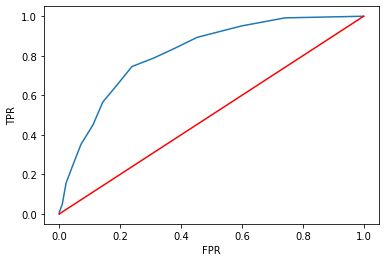

In [20]:
knn = KNeighborsClassifier(** rsearch_knn.best_params_)
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, roc_curve, classification_report

knn.fit(x_trains, y_train)

y_train_pred=knn.predict(x_trains)

y_train_prob=knn.predict_proba(x_trains)[:,1]

print('Confusion Matrix - Train: ', '\n' ,confusion_matrix(y_train, y_train_pred))

print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))

print('Classification Report - Test', classification_report(y_test, y_test_pred))

print('AUC- Train:' , roc_auc_score(y_train, y_train_prob))



y_test_pred= knn.predict(x_tests)

y_test_prob=knn.predict_proba(x_tests)[:,1]

print('Confusion Matrix - Test: ', '\n' ,confusion_matrix(y_test, y_test_pred))

print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))

print('AUC- Test:' , roc_auc_score(y_test, y_test_prob))

fpr, tpr, thresholds =roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'red')
plt.xlabel('FPR')
plt.ylabel('TPR')

# stacking results of 3 learners (random forest, knn, logistic regression)

Confusion Matrix - Train:  
 [[826  86]
 [146 172]]
Overall Accuracy - Train:  0.8113821138211382
Classification Report - Test               precision    recall  f1-score   support

           0       0.87      0.86      0.86       406
           1       0.54      0.57      0.55       122

    accuracy                           0.79       528
   macro avg       0.71      0.71      0.71       528
weighted avg       0.79      0.79      0.79       528

AUC- Train: 0.8558320920225091
Confusion Matrix - Test:  
 [[359  47]
 [ 57  65]]
Overall Accuracy - Test:  0.803030303030303
AUC- Test: 0.843111523863361


Text(0, 0.5, 'TPR')

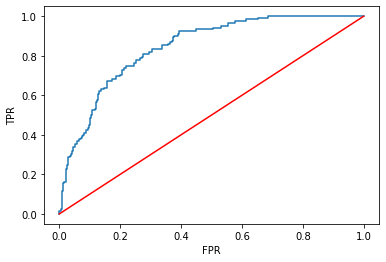

In [21]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(solver= 'liblinear')


lr.fit(x_trains, y_train)

y_train_pred=lr.predict(x_trains)

y_train_prob=lr.predict_proba(x_trains)[:,1]

print('Confusion Matrix - Train: ', '\n' ,confusion_matrix(y_train, y_train_pred))

print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))

print('Classification Report - Test', classification_report(y_test, y_test_pred))

print('AUC- Train:' , roc_auc_score(y_train, y_train_prob))



y_test_pred= lr.predict(x_tests)

y_test_prob=.predict_proba(x_tests)[:,1]

print('Confusion Matrix - Test: ', '\n' ,confusion_matrix(y_test, y_test_pred))

print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))

print('AUC- Test:' , roc_auc_score(y_test, y_test_prob))

fpr, tpr, thresholds =roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'red')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [22]:
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression(solver='liblinear')
knn = KNeighborsClassifier(**rsearch_knn.best_params_)
rfc = RandomForestClassifier(**rsearch_rfc.best_params_)

# HARD VOTING

In [24]:
clf = VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('rfc', rfc)], voting='hard')

clf.fit(x_trains, y_train)

y_train_pred = clf.predict(x_trains)
y_test_pred = clf.predict(x_tests)

print('Accuracy score - Train', accuracy_score(y_train, y_train_pred))
print('Accuracy score - Test', accuracy_score(y_test, y_test_pred))


Accuracy score - Train 0.8195121951219512
Accuracy score - Test 0.8011363636363636


# SOFT VOTING - Equal weightages

Confusion Matrix - Train:  
 [[837  75]
 [147 171]]
Overall Accuracy - Train:  0.8195121951219512
Classification Report - Test               precision    recall  f1-score   support

           0       0.85      0.90      0.87       406
           1       0.59      0.47      0.52       122

    accuracy                           0.80       528
   macro avg       0.72      0.68      0.70       528
weighted avg       0.79      0.80      0.79       528

AUC- Train: 0.8763516495641621
Confusion Matrix - Test:  
 [[365  41]
 [ 66  56]]
Overall Accuracy - Test:  0.7973484848484849
AUC- Test: 0.8382459823952193


Text(0, 0.5, 'TPR')

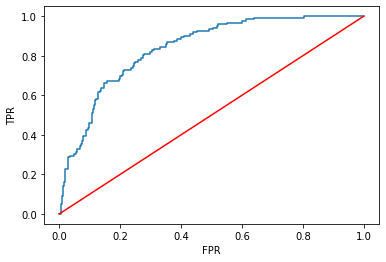

In [25]:
clf = VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('rfc', rfc)], voting='soft')

clf.fit(x_trains, y_train)

y_train_pred=clf.predict(x_trains)

y_train_prob=clf.predict_proba(x_trains)[:,1]

print('Confusion Matrix - Train: ', '\n' ,confusion_matrix(y_train, y_train_pred))

print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))

print('Classification Report - Test', classification_report(y_test, y_test_pred))

print('AUC- Train:' , roc_auc_score(y_train, y_train_prob))



y_test_pred= clf.predict(x_tests)

y_test_prob=clf.predict_proba(x_tests)[:,1]

print('Confusion Matrix - Test: ', '\n' ,confusion_matrix(y_test, y_test_pred))

print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))

print('AUC- Test:' , roc_auc_score(y_test, y_test_prob))

fpr, tpr, thresholds =roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'red')
plt.xlabel('FPR')
plt.ylabel('TPR')

Confusion Matrix - Train:  
 [[849  63]
 [153 165]]
Overall Accuracy - Train:  0.824390243902439
Classification Report - Test               precision    recall  f1-score   support

           0       0.85      0.90      0.87       406
           1       0.58      0.46      0.51       122

    accuracy                           0.80       528
   macro avg       0.71      0.68      0.69       528
weighted avg       0.78      0.80      0.79       528

AUC- Train: 0.8806307238221339
Confusion Matrix - Test:  
 [[365  41]
 [ 69  53]]
Overall Accuracy - Test:  0.7916666666666666
AUC- Test: 0.8369538883953807


Text(0, 0.5, 'TPR')

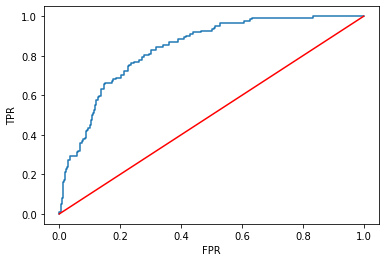

In [26]:
clf = VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('rfc', rfc)], weights=[1,2,3] ,voting='soft')

clf.fit(x_trains, y_train)

y_train_pred=clf.predict(x_trains)

y_train_prob=clf.predict_proba(x_trains)[:,1]

print('Confusion Matrix - Train: ', '\n' ,confusion_matrix(y_train, y_train_pred))

print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))

print('Classification Report - Test', classification_report(y_test, y_test_pred))

print('AUC- Train:' , roc_auc_score(y_train, y_train_prob))



y_test_pred= clf.predict(x_tests)

y_test_prob=clf.predict_proba(x_tests)[:,1]

print('Confusion Matrix - Test: ', '\n' ,confusion_matrix(y_test, y_test_pred))

print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))

print('AUC- Test:' , roc_auc_score(y_test, y_test_prob))

fpr, tpr, thresholds =roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'red')
plt.xlabel('FPR')
plt.ylabel('TPR')